# COMP257 Portfolio 2

### Matthew Seery
### 44760442

# Load Imports & Create Table From Training Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy

train = pd.read_csv("files/wine_train.csv")
train

C:\Users\Matthew\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Year  LogPrice  WinterRain  Temperature  HarvestRain  TimeYears
0   1952  -0.99868         600      17.1167          160         31
1   1953  -0.45440         690      16.7333           80         30
2   1955  -0.80796         502      17.1500          130         28
3   1957  -1.50926         420      16.1333          110         26
4   1958  -1.71655         582      16.4167          187         25
5   1959  -0.41800         485      17.4833          187         24
6   1960  -1.97491         763      16.4167          290         23
7   1961   0.00000         830      17.3333           38         22
8   1962  -1.10572         697      16.3000           52         21
9   1963  -1.78098         608      15.7167          155         20
10  1964  -1.18435         402      17.2667           96         19
11  1965  -2.24194         602      15.3667          267         18
12  1966  -0.74943         819      16.5333           86         17
13  1967  -1.65388         714      16.2333          118         16
14  1968  -2.25018         610      16.2000          292         15
15  1969  -2.14784         575      16.5500          244         14
16  1970  -0.90544         622      16.6667           89         13
17  1971  -1.30031         551      16.7667          112         12
18  1972  -2.28879         536      14.9833          158         11
19  1973  -1.85700         376      17.0667          123         10
20  1974  -2.19958         574      16.3000          184          9
21  1975  -1.20168         572      16.9500          171          8
22  1976  -1.37264         418      17.6500          247          7
23  1977  -2.23503         821      15.5833           87          6

# Plot to show how wine price changes with temperature
The plot shows a positive linear relationship between Temperature and LogPrice.

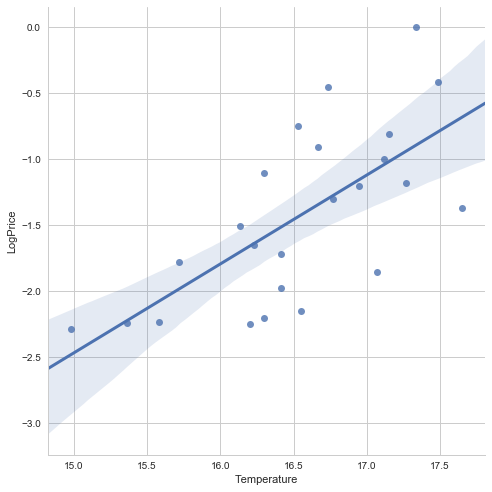

In [2]:
sns.lmplot("Temperature","LogPrice", train, size = 7, aspect = 1)

# Examination of the data to determine if any outliers exist or if any variables need normalization
The boxplots shows no outliers for each of the four variables and the scatterplots in the pair plots also do not provide any strong evidence for the existence of outliers. The histograms for the same four variables appear to be marginally normal even though LogPrice shows a higher than expected frequency for the most lowest values in the distribution. However, as the sample size is only 23, there is no compelling evidence that any of the variables require normalization. For Year and TimeYear, normalization is not relevant due to the nature of the data in those variables.

In [3]:
f, axes = plt.subplots(1, 4, figsize=(22, 5))
sns.boxplot(train['LogPrice'],orient='v' , ax=axes[0], color = 'y')
sns.boxplot(train['WinterRain'],orient='v' , ax=axes[1], color = 'r')
sns.boxplot(train['Temperature'],orient='v' , ax=axes[2], color = 'g')
sns.boxplot(train['HarvestRain'],orient='v' , ax=axes[3], color = 'b')

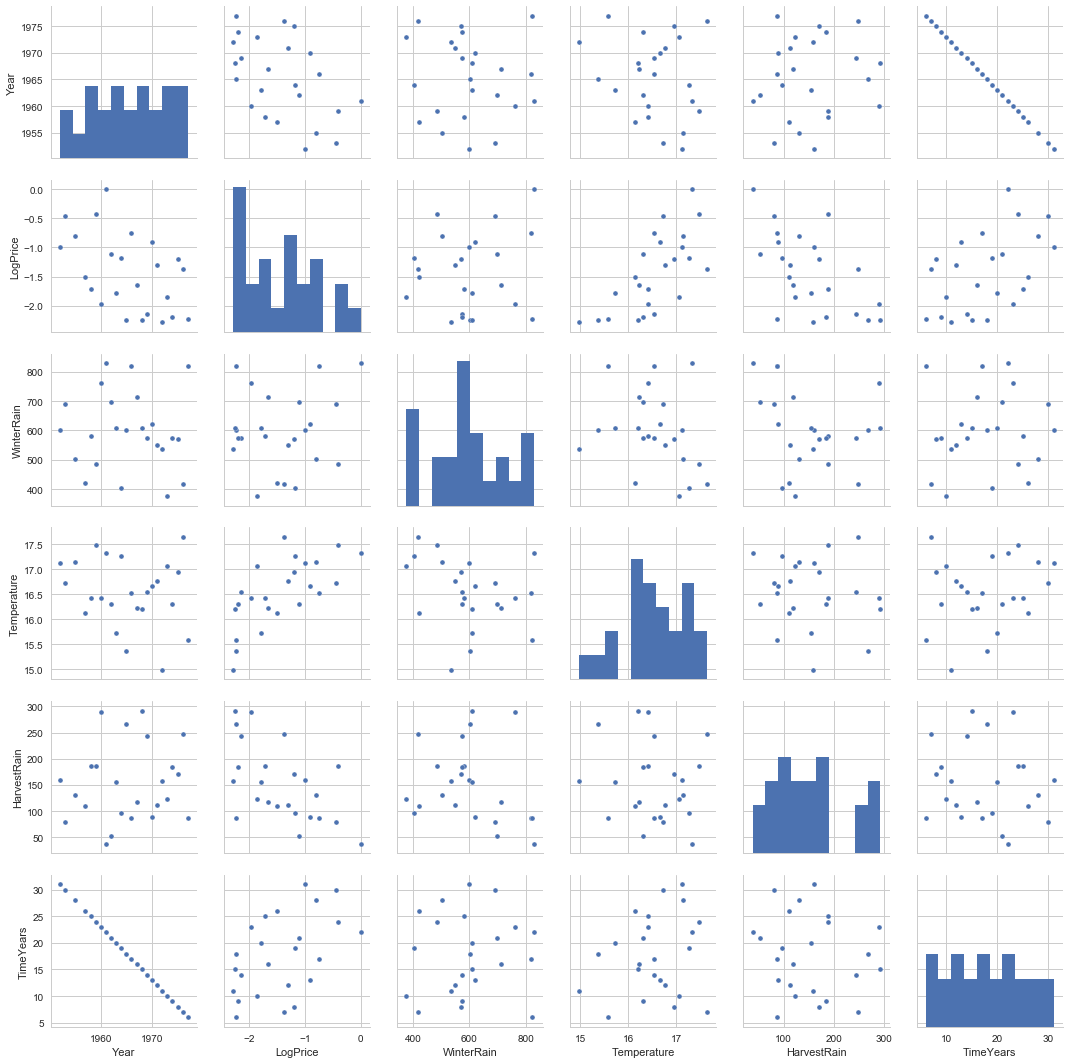

In [4]:
sns.pairplot(train, plot_kws={"s": 25})

# Linear Regression summary with one independent variable temperature with a constant value set.

In [5]:
X = train[['Temperature']]
y = train[['LogPrice']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     19.34
Date:                Sun, 17 Sep 2017   Prob (F-statistic):           0.000228
Time:                        20:52:31   Log-Likelihood:                -16.142
No. Observations:                  24   AIC:                             36.28
Df Residuals:                      22   BIC:                             38.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.5727      2.536     -4.959      0.000     -17.831      -7.314
Temperature     0.6737      0.153      4.398      0.000       0.356       0.991
==============================================================================
Omnibus:                        0.626   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.644
Skew:                           0.074   Prob(JB):                        0.725
Kurtosis:                       2.211   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Result documentation and summary statistics table explaination.
The value of the constant coefficient is -12.5727 with a standard error of 2.536 and a 95% confidence interval of (-17.831, -7.314). The value of the Temperature coefficient is 0.6737 with a standard error of 0.153 and a 95% confidence interval of (0.356, 0.991). The p-value (P>|t|) for both is less than 0.05 so the linear equation that can be derived from the summary is yhat = -12.57 + 0.67x where y represents the LogPrice and x represents Temperature. This means that for every 1 degree increase in Temperature, there will be a 0.67 increase in LogPrice.

At 0.000228, the p-value of the F-Statistic for the model is significant. However, the R-squared value is just 0.468 which means only 46.8% of variability in LogPrice can be explained by Temperature.

# Model with the addition of another independent variable
The additon of HarvestRain has improved the model. The r-squared value and p-value for the F-statistic has improved. The difference in the upper and lower limits of the 95% confidence interval for the constant and Temperature has also reduced.

In [6]:
X = train[['Temperature','HarvestRain']]
y = train[['LogPrice']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sun, 17 Sep 2017   Prob (F-statistic):           2.44e-06
Time:                        20:52:34   Log-Likelihood:                -8.9428
No. Observations:                  24   AIC:                             23.89
Df Residuals:                      21   BIC:                             27.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.8356      1.968     -5.507      0.000     -14.927      -6.744
Temperature     0.6100      0.117      5.207      0.000       0.366       0.854
HarvestRain    -0.0045      0.001     -4.155      0.000      -0.007      -0.002
==============================================================================
Omnibus:                        1.463   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                0.894
Skew:                          -0.472   Prob(JB):                        0.640
Kurtosis:                       2.942   Cond. No.                     4.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Commentary on R2 error change after the addition of a second independent variable.
With the addition of the second independent variable, HarvestRain, the value of R2 has improved. The variables Temperature and HarvestRain now explain 70.8% of the variability in LogPrice.

# Evidence that the model does not suffer from multicollinearity issues.
The only two independent variables in the model are Temperature and HarvestRain. The correlation coefficient between the two variables is -0.1307 which is not close to 1 or -1. The p-value is also > 0.05 so is not significant. Therefore, there is no evidence of multicollinearity issues. 

In [7]:
scipy.stats.pearsonr(train['Temperature'], train['HarvestRain'])

(-0.1307203420222128, 0.54263631032055426)

## Prediction values for the year 1978, 1979, 1980
The prediction value for 1979 was almost identical to the actual value recorded while the prediction value for 1978 was very close to the actual value. However, the prediction value for 1980 was not so accurate.

In [8]:
test = pd.read_csv("files/wine_test.csv")

predict_values = []

x = train[['Temperature','HarvestRain']]
y = train['LogPrice']
model = LinearRegression()
model.fit(x, y)

x2 = test[['Temperature','HarvestRain']]
y_hat = model.predict(x2)


for i in range (0,test.shape[0]):
    predict_values.append([test['Year'][i],y_hat[i], test['LogPrice'][i]])
    

column_names = ['Year','Predicted Value','Actual Value']
df = pd.DataFrame(predict_values,columns=column_names)
df

Year  Predicted Value  Actual Value
0  1978        -1.415640      -1.30769
1  1979        -1.520667      -1.53960
2  1980        -1.407009      -1.99582